In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import BFast
import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 13})
tf.config.list_physical_devices('GPU')

2024-02-06 20:02:15.951726: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 20:02:15.951772: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 20:02:15.951800: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
BoxSize = 1000.
kF = 2*np.pi/BoxSize
grid = 256

In [3]:
df = np.load(f"/scratch/p301831/Quijote_Density_256/fiducial/0/df_m_256_PCS_fiducial_z=0_0.npy")

In [4]:
tf.config.experimental.get_memory_info('GPU:0')['peak']*1e-9

0.0

In [5]:
help(BFast.Bk_fast)

Help on function Bk_fast in module BFast.BFast:

Bk_fast(delta, BoxSize, fc, dk, Nbins, triangle_type, MAS, verbose=False)



In [6]:
%time Bks_fast = BFast.Bk_fast(df,BoxSize,3.,3.,27,'All','PCS',verbose=True)

Loading Counts from BFast_BkCounts_LBox1000_Grid256_Binning3kF_fc3_NBins27_TriangleTypeAll.npy
Considering 2276 Triangle Configurations (All)


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/2276 [00:00<?, ?it/s]

CPU times: user 4.72 s, sys: 329 ms, total: 5.05 s
Wall time: 5.61 s


In [7]:
BFast.Pk(df,1000.,'PCS')

<tf.Tensor: shape=(127,), dtype=float32, numpy=
array([18688.406  , 22529.615  , 30037.121  , 19273.088  , 17039.863  ,
       14412.61   , 14084.808  , 11749.745  , 11234.328  ,  9906.004  ,
        9120.76   ,  9325.433  ,  7681.0513 ,  6735.6416 ,  6143.11   ,
        5701.615  ,  5021.995  ,  4748.8975 ,  4295.1104 ,  4393.804  ,
        4008.431  ,  3770.1006 ,  3588.9797 ,  3357.935  ,  3173.344  ,
        2934.3145 ,  2840.1682 ,  2645.1367 ,  2639.6636 ,  2517.2756 ,
        2418.6365 ,  2339.0261 ,  2233.5781 ,  2143.2156 ,  2051.881  ,
        1931.4678 ,  1930.0848 ,  1852.8134 ,  1748.8329 ,  1721.3241 ,
        1689.2322 ,  1620.1259 ,  1572.6809 ,  1534.4303 ,  1501.58   ,
        1493.9047 ,  1410.2218 ,  1403.105  ,  1341.7667 ,  1337.6892 ,
        1276.4825 ,  1275.9375 ,  1238.793  ,  1215.5255 ,  1175.0359 ,
        1162.3981 ,  1155.0438 ,  1114.981  ,  1095.9413 ,  1057.8424 ,
        1061.5387 ,  1046.946  ,  1013.5709 ,  1006.6187 ,   986.8236 ,
         970.871

In [ ]:
%time Bks = BFast.Bk(df,BoxSize,3.,3.,27,'All','PCS',verbose=True)

Loading Counts from BFast_BkCounts_LBox1000_Grid256_Binning3kF_fc3_NBins27_TriangleTypeAll.npy
Considering 2276 Triangle Configurations (All)


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/2276 [00:00<?, ?it/s]

CPU times: user 12.1 s, sys: 71 ms, total: 12.1 s
Wall time: 12.4 s


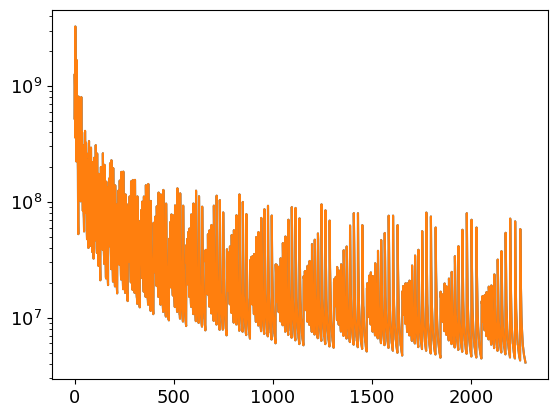

In [ ]:
plt.semilogy(Bks_fast[:,-2])
plt.semilogy(Bks[:,-2])

In [ ]:
%time BFast.Pk(df,1000.,MAS=None)

<tf.Tensor: shape=(127,), dtype=float64, numpy=
array([1.86788765e+04, 2.25029075e+04, 2.99666936e+04, 1.91962539e+04,
       1.69377603e+04, 1.42927554e+04, 1.39283033e+04, 1.15829093e+04,
       1.10341418e+04, 9.69144164e+03, 8.88365358e+03, 9.03962873e+03,
       7.40515868e+03, 6.45685420e+03, 5.85443239e+03, 5.39925711e+03,
       4.72349783e+03, 4.43396970e+03, 3.97956921e+03, 4.03874808e+03,
       3.65348281e+03, 3.40585230e+03, 3.21217201e+03, 2.97670691e+03,
       2.78508538e+03, 2.54768921e+03, 2.43949752e+03, 2.24658198e+03,
       2.21595316e+03, 2.08785945e+03, 1.98104231e+03, 1.89106536e+03,
       1.78190924e+03, 1.68652319e+03, 1.59190918e+03, 1.47679654e+03,
       1.45386220e+03, 1.37433197e+03, 1.27687641e+03, 1.23667814e+03,
       1.19358243e+03, 1.12540630e+03, 1.07334283e+03, 1.02857828e+03,
       9.88387625e+02, 9.65234152e+02, 8.94003232e+02, 8.72177126e+02,
       8.17582539e+02, 7.98620819e+02, 7.46362221e+02, 7.30318817e+02,
       6.93820965e+02, 6.6588